## BoomBikes Case study

### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.
So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Data Understanding

In [2]:
bikes=pd.read_csv("day.csv")

In [3]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.shape # 730 rows and 16 columns

(730, 16)

In [5]:
bikes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Attributes

In [6]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 2. Exploratory Data Analysis & Data Cleaning

In [7]:
bikes.isna().sum() # From below, we can conclude that none of the features have null values 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
bikes.select_dtypes("object").columns.to_list()

['dteday']

In [9]:
# Only Object feature in the dataset is - 'dteday'
# As we already have the features- 'yr' & 'mnth' which is same as the 'dteday'.... 
# we will create a column 'day' and drop the 'dteday' column

In [10]:
# Also, 'instant' column seems redundant... It can be of no use to our model.
# So, we will be dropping this column too

In [11]:
bikes['day']=bikes['dteday'].apply(lambda x: x[:2])
bikes.drop(["dteday",'instant'],axis=1,inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


In [12]:
bikes.day=bikes.day.astype("int64")

In [13]:
bikes.info() # Now, our dataset does not contain any non- numeric features or non-null values as in.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  day         730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


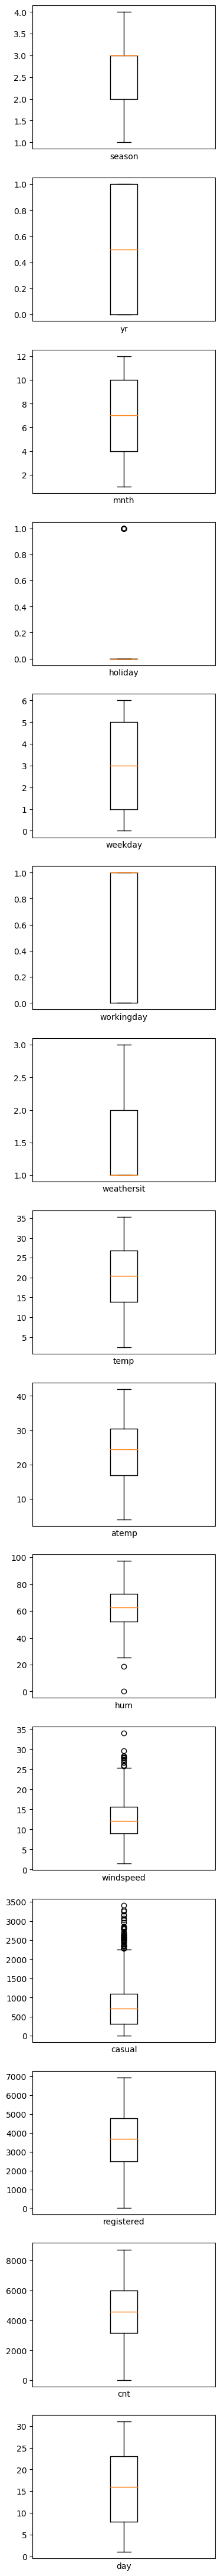

In [14]:
# Univariate Analysis

plt.figure(figsize=(4,60))
j=1 # j cant be 0

for i in bikes.columns:
        
    plt.subplot(16,1,j) #16 rows and 1 column and j resembles the element position
    plt.boxplot(bikes[i])
    plt.xticks([]) # xticks are hided
    plt.xlabel(i)
    j=j+1

plt.show()

In [15]:
# The above boxplots shows that the 'windspeed' & 'casual' features have outliers and this is understandable.
# There is no need to concern about it

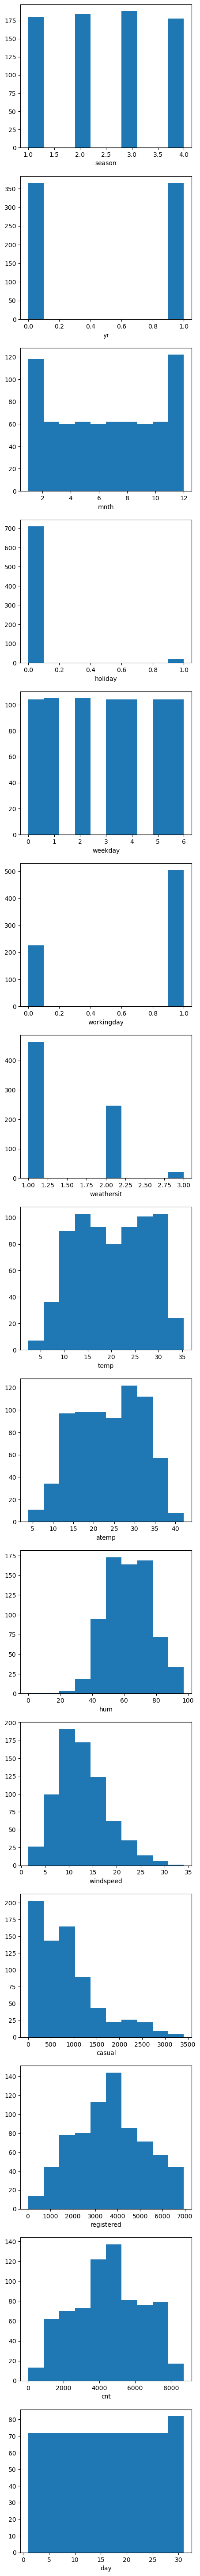

In [16]:
plt.figure(figsize=(5,80))
j=1

for i in bikes.columns:
        
    plt.subplot(16,1,j) #16 rows and 1 column and j resembles the element position
    plt.hist(bikes[i])
    plt.xlabel(i)
    j=j+1

plt.show()

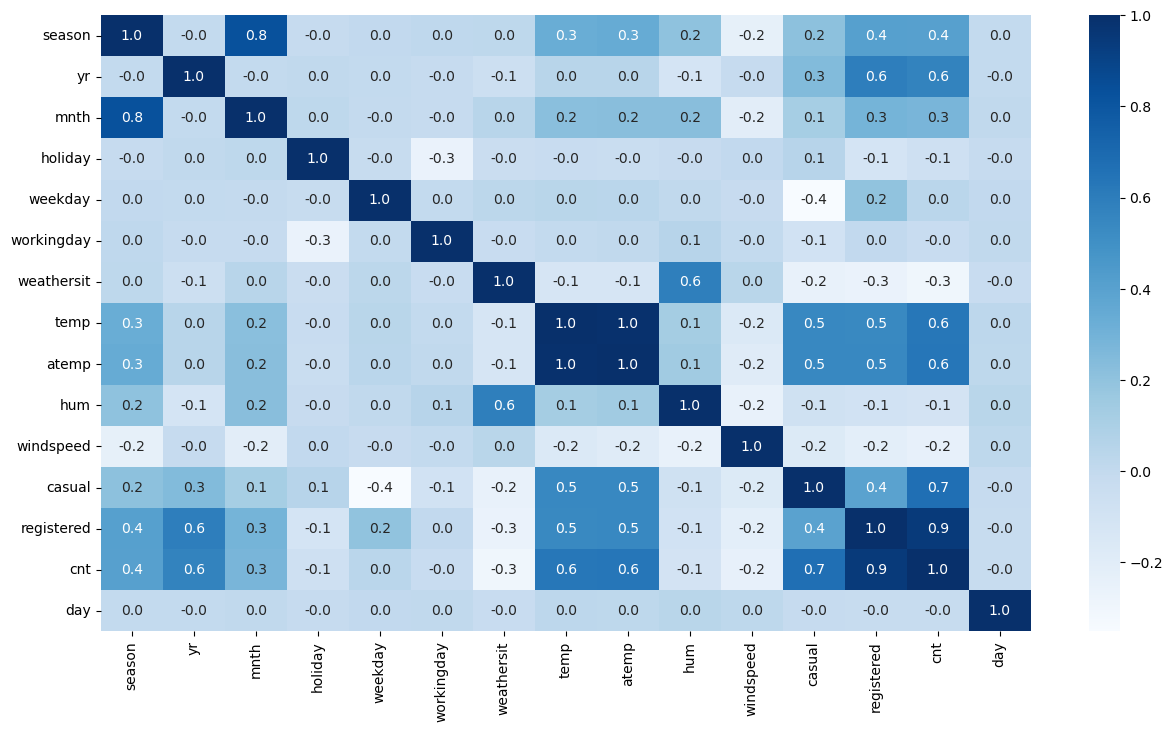

In [17]:
# Bi-variate Analysis

plt.figure(figsize=(15,8))

sns.heatmap(bikes.corr(),annot=True,fmt='.1f',cmap='Blues')

plt.show()


<Figure size 800x800 with 0 Axes>

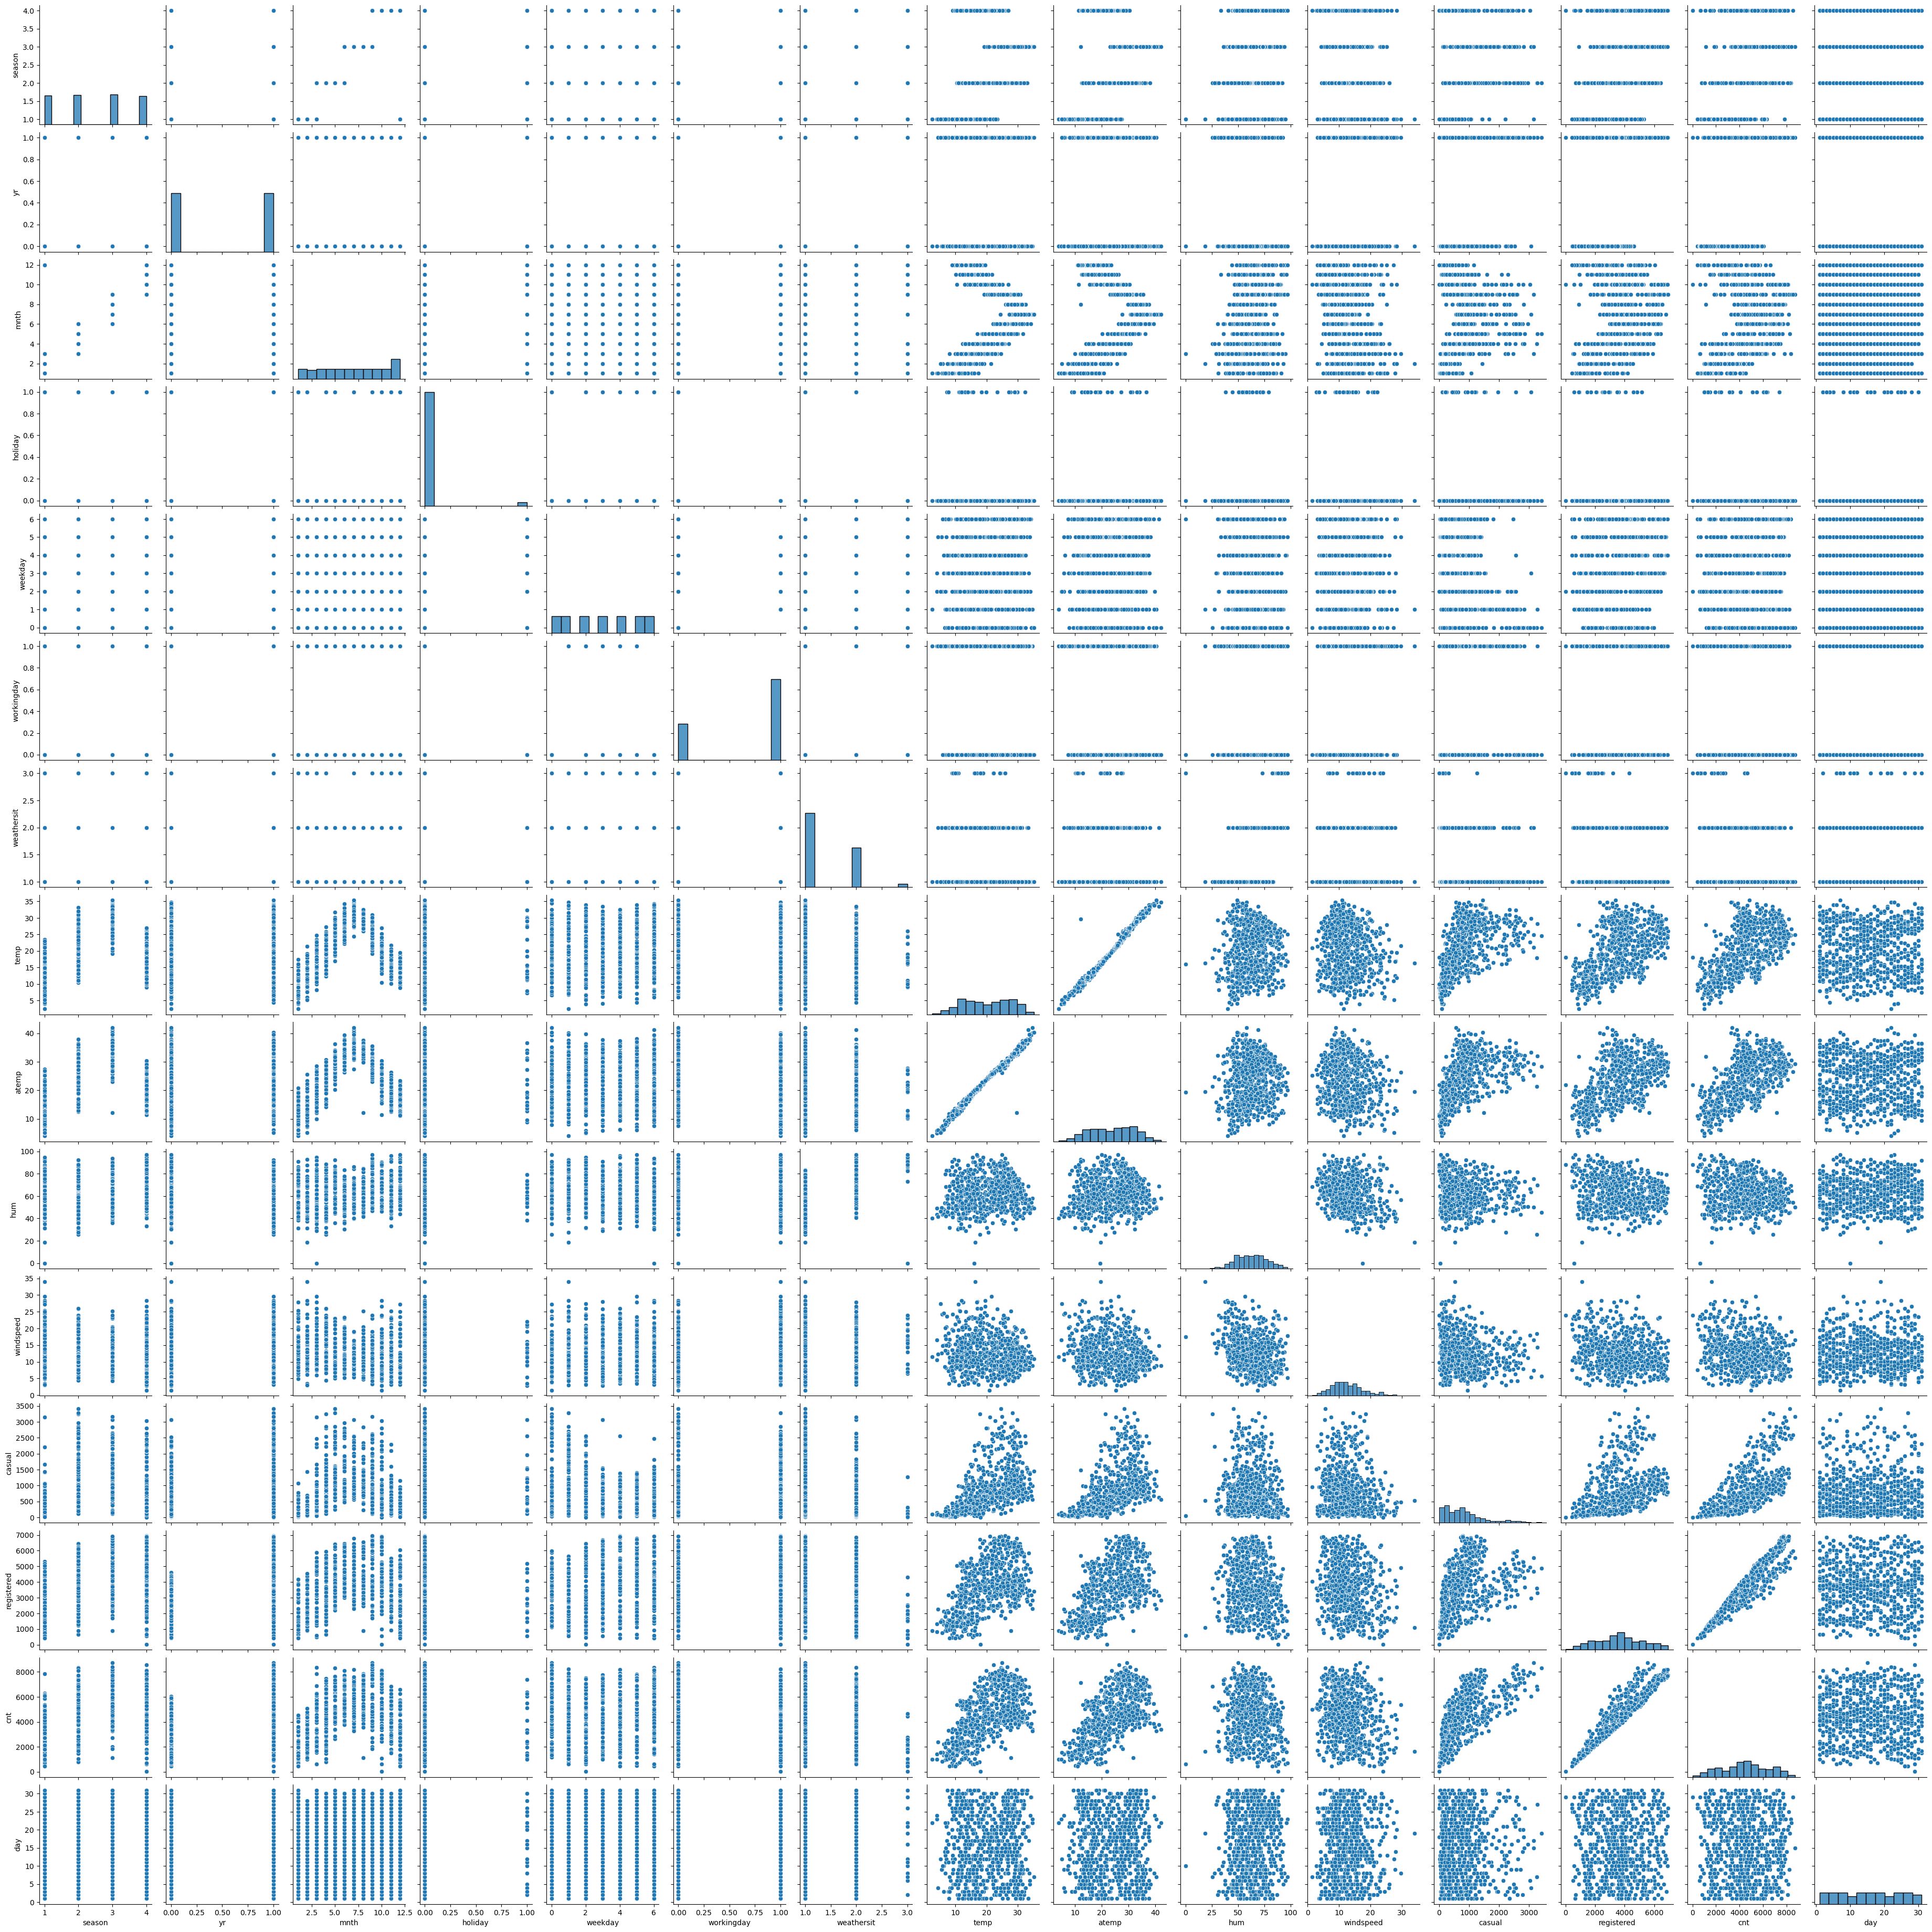

In [18]:
plt.figure(figsize=(8,8))

sns.pairplot(bikes[bikes.columns])

plt.show()

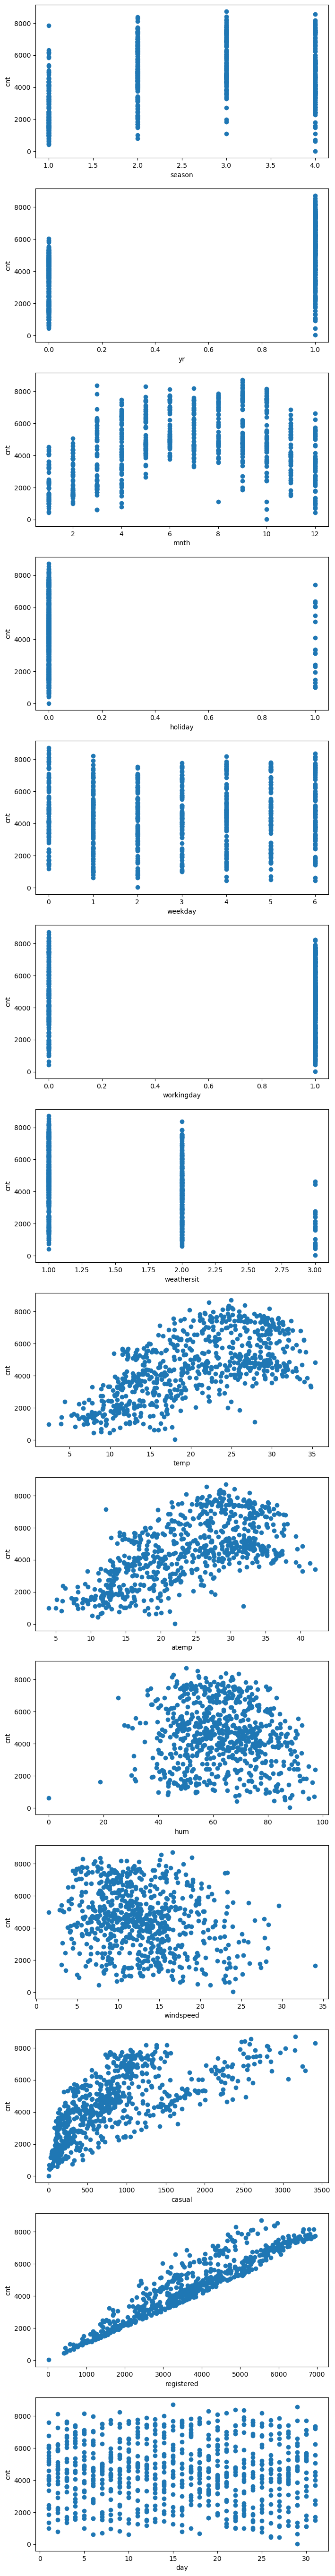

In [19]:
# The above pairplot is hard to interpret, so lets plot only the 'cnt' vs rest of the features
plt.figure(figsize=(8,70))
j=1; 

for i in bikes.columns:
    if i!='cnt':
        plt.subplot(14,1,j)
        plt.scatter(bikes[i],bikes['cnt'])
        plt.xlabel(i)
        plt.ylabel('cnt')
        j=j+1

plt.show()


In [20]:
# Linear relation can be observed between 
# 1. 'registered' and 'cnt'.
# 2. 'temp' and 'cnt'

## 3. Data Preparation

In [21]:
# As the data neither have any irregular points nor nulls, there is no need for imputation.
# But we have some categorical features which needs to be treated before modelling

In [22]:
bikes[['atemp','temp']].corr()
# if we look at these 2 features, they are highly positive correlated. Hence we can drop either of them.
# Lets drop 'atemp' column.

,atemp,temp
atemp,1.000000,0.991696
temp,0.991696,1.000000


In [23]:
bikes.drop('atemp',axis=1,inplace=True)

In [24]:
# Also features- 'registered' & 'casual' are directly related to 'cnt' target variable.
# So we will be dropping these features too.
# Otherwise the model will be overfitted.

In [25]:
bikes.drop(['registered','casual'],axis=1,inplace=True)

### Dummy Variables

## 4. Data Pre-processing

### Splitting the Data into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
bikes_train,bikes_test=train_test_split(bikes,train_size = 0.7, test_size = 0.3)

In [28]:
bikes_train.shape

(510, 12)

In [29]:
bikes_test.shape

(219, 12)

### Scaling the features in Training dataset

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaling=MinMaxScaler()

In [32]:
scaled_vars=['temp','hum','windspeed']

In [33]:
bikes_train[scaled_vars]=scaling.fit_transform(bikes_train[scaled_vars])

In [34]:
bikes_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2.515686,0.488235,6.603922,0.027451,3.025490,0.698039,1.411765,0.542416,0.647595,0.350801,4496.256863,15.892157
std,1.111977,0.500352,3.469200,0.163554,1.974627,0.459559,0.552774,0.232550,0.147869,0.160371,1979.630358,8.780568
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,22.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.338296,0.536953,0.232701,3074.750000,8.000000
50%,3.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.553070,0.651671,0.334200,4510.000000,16.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.747156,0.750214,0.438484,6042.500000,23.750000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,8714.000000,31.000000


### Dividing the data into X and Y sets for the model building

In [35]:
y_train=bikes_train.pop('cnt')
x_train=bikes_train

## 5. Data Modelling

In [36]:
import statsmodels.api as sm

In [37]:
x_train=sm.add_constant(x_train)

model=sm.OLS(y_train, x_train).fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.72e-178
Time:                        21:16:05   Log-Likelihood:                -4155.2
No. Observations:                 510   AIC:                             8334.
Df Residuals:                     498   BIC:                             8385.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2342.4217    256.321      9.139      0.000    1838.818    2846.026
season       539.8330     60.722      8.890      0.000     420.531     659.135
yr          2074.7941     76.056     27.280      0.000    1925.363    2224.225
mnth         -47.5759     18.717     -2.542      0.011     -84.350     -10.802
holiday     -683.5626    237.798     -2.875      0.004   -1150.774    -216.351
weekday       40.2002     19.100      2.105      0.036       2.674      77.727
workingday  -161.2766     85.601     -1.884      0.060    -329.459       6.906
weathersit  -663.6934     88.913     -7.465      0.000    -838.384    -489.003
temp        4131.0032    180.695     22.862      0.000    3775.985    4486.021
hum         -820.7232    351.562     -2.335      0.020   -1511.451    -129.996
windspeed  -1478.2480    250.479     -5.902      0.000   -1970.374    -986.122
day           -9.2482      4.294     -2.154      0.032     -17.685      -0.811
==============================================================================
Omnibus:                       53.588   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.724
Skew:                          -0.646   Prob(JB):                     6.02e-22
Kurtosis:                       4.712   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. Model Evaluation

In [39]:
bikes_test[scaled_vars]=scaling.transform(bikes_test[scaled_vars])

In [40]:
y_test=bikes_test.pop('cnt')
x_test=bikes_test

In [41]:
x_test=sm.add_constant(x_test)

### Residual Analysis on the Testing set

In [42]:
residual_test=y_test- model.predict(x_test)

### I. Validating the Residuals are in normal distribution

<Axes: ylabel='Density'>

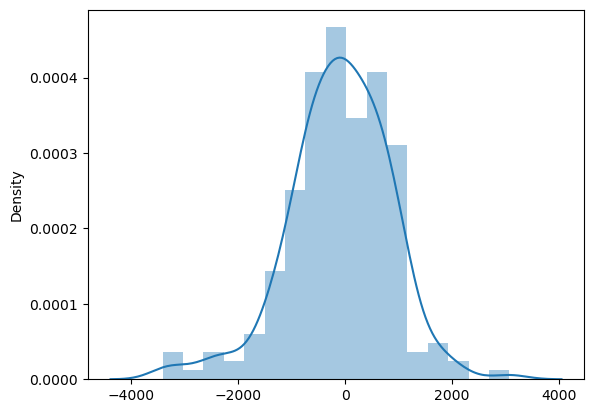

In [43]:
sns.distplot(residual_test)

### II. Validating the Heteroscadasicity

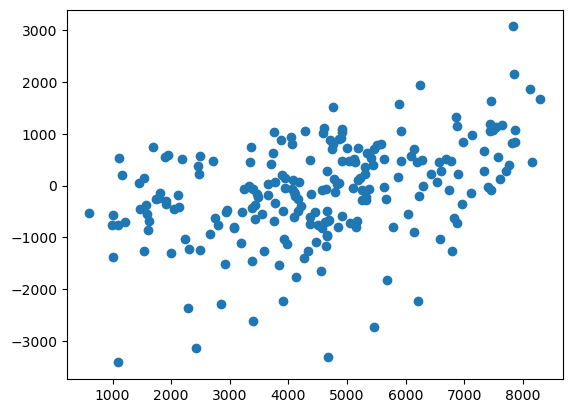

In [44]:
plt.scatter(y_test,residual_test)

In [45]:
# We notice that the errors are scattered and they are not showing any meaningful variance.

In [47]:
from sklearn.metrics import r2_score

In [48]:
# R2 Score
r2_score(y_test,model.predict(x_test))

0.7265224256927799

## y_test vs y_pred

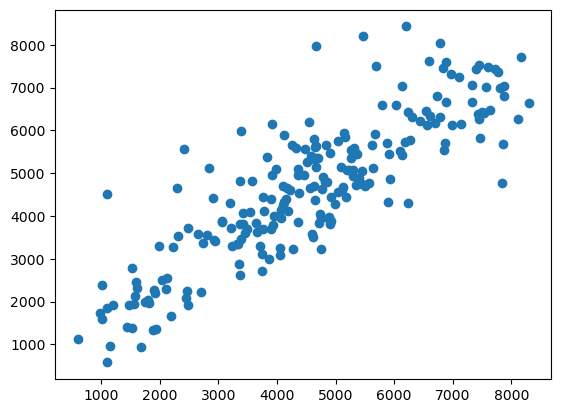

In [50]:
plt.scatter(y_test,model.predict(x_test))
plt.show()

In [51]:
# This Model with R2 score of 73% is considerably good enough.